In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
model = ChatGroq(model="openai/gpt-oss-20b")

Define state:

In [4]:
class BlogState(TypedDict):

    title: str
    outline: str
    content: str

Functions:

In [5]:
def create_outline(state: BlogState) -> BlogState:
    # Fetch title
    title = state['title']

    # Call LLM
    prompt = f'Generate a detailed outloine for a blog on the topic - {title}'
    outline = model.invoke(prompt).content
    
    #Update state
    state['outline'] = outline

    return state

In [7]:
def create_blog(state: BlogState) -> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state

Add nodes & edges

In [8]:
graph = StateGraph(BlogState)

#nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)

#edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

In [9]:
workflow = graph.compile()

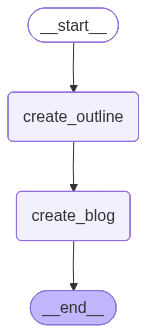

In [10]:
workflow

### Test

In [11]:
initial_state = {
    'title': 'rise of ai in India'
}

final_state = workflow.invoke(initial_state)

print(final_state)

{'title': 'rise of ai in India', 'outline': '**Blog Title:**  \n**“From Silicon Valley to Silicon Valley of India: The Rise of AI in the Subcontinent”**\n\n---\n\n## 1. Introduction  \n- Hook: A striking statistic or anecdote (e.g., “India’s AI market is projected to reach $8.5\u202fbn by 2028.”)  \n- Brief definition of AI and why it matters today.  \n- Thesis statement: India is rapidly emerging as a global AI powerhouse—thanks to talent, policy, and a booming startup ecosystem.\n\n## 2. Historical Context  \n- **Early AI research in India** (1970s–1990s):  \n  - IITs & BARC pioneering work.  \n  - First AI labs and seminal research papers.  \n- **The “IT boom” era**:  \n  - Role of software outsourcing in building foundational data skills.  \n- **Transition to AI**:  \n  - Shift from rule‑based systems to machine learning in the 2000s.  \n\n## 3. Current AI Landscape in India  \n### 3.1 Market Size & Growth  \n- CAGR, current valuation, projected 2028–2030 figures.  \n- Comparison w

In [14]:
print(final_state['outline'])

**Blog Title:**  
**“From Silicon Valley to Silicon Valley of India: The Rise of AI in the Subcontinent”**

---

## 1. Introduction  
- Hook: A striking statistic or anecdote (e.g., “India’s AI market is projected to reach $8.5 bn by 2028.”)  
- Brief definition of AI and why it matters today.  
- Thesis statement: India is rapidly emerging as a global AI powerhouse—thanks to talent, policy, and a booming startup ecosystem.

## 2. Historical Context  
- **Early AI research in India** (1970s–1990s):  
  - IITs & BARC pioneering work.  
  - First AI labs and seminal research papers.  
- **The “IT boom” era**:  
  - Role of software outsourcing in building foundational data skills.  
- **Transition to AI**:  
  - Shift from rule‑based systems to machine learning in the 2000s.  

## 3. Current AI Landscape in India  
### 3.1 Market Size & Growth  
- CAGR, current valuation, projected 2028–2030 figures.  
- Comparison with global leaders (USA, China, EU).  

### 3.2 Key Sectors Leveraging A

In [15]:
print(final_state['content'])

**From Silicon Valley to Silicon Valley of India: The Rise of AI in the Subcontinent**  
*By [Your Name]*  

---

### 1. Introduction  

> **Hook:** *“India’s AI market is projected to reach **$8.5 bn** by 2028, outpacing many developed economies.”* [1]  

Artificial Intelligence (AI) is no longer a buzzword; it’s a transformative force reshaping industries, governance, and everyday life. From diagnosing diseases in remote villages to powering fintech fraud detection, AI is redefining “possible.”  

**Thesis:** India is rapidly emerging as a global AI powerhouse—thanks to a deep talent reservoir, forward‑thinking policy, and a vibrant startup ecosystem that turns ideas into market‑ready solutions.

---

### 2. Historical Context  

| Era | Milestones | Key Players | Impact |
|-----|------------|-------------|--------|
| **1970s‑1990s – Early AI research** | • IITs (Bombay, Delhi) and BARC set up AI labs.<br>• First Indian AI papers on expert systems and knowledge bases. | *Prof. T. V. 